In [1]:
import numpy as np
import matplotlib.pyplot as plt
from read_dataset import load_mnist
from sklearn import preprocessing
from scipy.io import loadmat
#some necessary stuff for formatting outputs(You can skip it!!)
%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'
%load_ext autoreload
%autoreload 2

In [2]:
data = loadmat('matlab.mat') 
X_train = data['X']  
y = data['y']

In [3]:
from sklearn.preprocessing import OneHotEncoder  
encoder = OneHotEncoder(sparse=False)  
y_train = encoder.fit_transform(y)  
y_train.shape

(5000, 10)

In [4]:
input_size = 400  
hidden_size = 15  
num_labels = 10  
learning_rate = 1e-4

W1 = 0.01 * np.random.randn(input_size,hidden_size) # new Array of [2 x 10]
b1 = np.zeros((1,hidden_size)) #new araay of [1 x 100]
W2 = 0.01 * np.random.randn(hidden_size,num_labels) # new array of [10 x 3]
b2 = np.zeros((1,num_labels)) # new array of [1 x 3]

# some hyperparameters
step_size = 1e-2
reg = 1e-1 # regularization strength

# gradient descent loop
num_examples = X_train.shape[0]
print('Num of tuples:',num_examples)

def get_random_batch(X, Y, batch_size):
    N,_ = X.shape
    indexes = np.random.randint(N,size=batch_size)
    batch_x, batch_y = np.copy(X[indexes]),np.copy(Y[indexes])
    return batch_x, batch_y

Num of tuples: 5000


In [5]:
def sigmoid(z):
    return (1/(1+np.exp(-z)))
def sigmoid_gradient(z):
    return sigmoid(z)*(1-sigmoid(z))

In [6]:
def cost(X_train,y_train,W1,W2,b1,b2):
    num_examples = X_train.shape[0]
    z1 = np.dot(X_train, W1) + b1 # z1 = X * W1 + b1
    #print('W1',np.max(W1))
    #print('Z1',np.max(z1))
    hidden_layer = sigmoid(z1) # note, ReLU activation where ReLU(x) = max(0,x)
    z2 = np.dot(hidden_layer, W2) + b2
    #print('Z2',np.max(z2))
    scores = sigmoid(z2) 
    #print('Scores',np.max(scores))
    data_loss = np.sum(np.sum((scores-y_train)**2,axis=0))/(2*num_examples)
    #print('Loss',data_loss)
    loss = data_loss
    
    return z1,hidden_layer,scores,loss

In [7]:
loss_his = []
accuracy_history = []
for i in range(1000):
    X_batch,y_batch = get_random_batch(X_train,y_train,128)
    z1,hidden_layer,scores,loss = cost(X_batch,y_batch,W1,W2,b1,b2)
    loss_his.append(loss)
    s = sigmoid(np.dot(sigmoid(np.dot(X_batch, W1) + b1), W2) + b2)
    p = np.argmax(s,axis=1)
    q = np.argmax(y_batch,axis=1)
    accuracy  = np.mean(p == q)
    accuracy_history.append(accuracy)
    if i % 100 == 0:
        print("iteration %d: loss %f" % (i, loss))
    # compute the gradient on scores
    error = (scores-y_batch)
    # backpropate the gradient to the parameters
    # first backprop into parameters W2 and b2
    dW2 = np.dot(hidden_layer.T, error) 
    db2 = np.sum(error, axis=0, keepdims=True)
    # next backprop into hidden layer
    dhidden = np.dot(error, W2.T) * sigmoid_gradient(z1)
    dW1 = np.dot(X_batch.T, dhidden) 
    db1 = np.sum(dhidden, axis=0, keepdims=True)

    # perform a parameter update
    W1 += -step_size * dW1
    b1 += -step_size * db1
    W2 += -step_size * dW2
    b2 += -step_size * db2

iteration 0: loss 1.249499
iteration 100: loss 0.231450
iteration 200: loss 0.110815
iteration 300: loss 0.060265
iteration 400: loss 0.099393
iteration 500: loss 0.086695
iteration 600: loss 0.074479
iteration 700: loss 0.041487
iteration 800: loss 0.038815
iteration 900: loss 0.051346


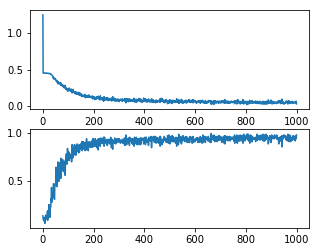

In [8]:
plt.subplot(2, 1, 1)
plt.plot(loss_his)
plt.subplot(2, 1, 2)
plt.plot(accuracy_history)

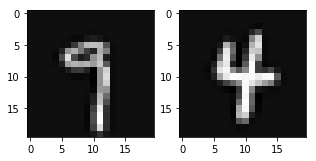

[7 4 1 9]


In [9]:
X_batch,_ = get_random_batch(X_train,y_train,4)
scor = sigmoid(np.dot(sigmoid(np.dot(X_batch, W1) + b1), W2) + b2)
fig = plt.figure()
a=fig.add_subplot(1,2,1)
imgplot = plt.imshow(X_batch[0].reshape((20,20)).T)
a=fig.add_subplot(1,2,2)
imgplot = plt.imshow(X_batch[1].reshape((20,20)).T)
plt.show()
print(np.argmax(scor,axis=1))

In [10]:
acc = 0
for n in range(10):
    scores = sigmoid(np.dot(sigmoid(np.dot(X_train, W1) + b1), W2) + b2)
    pr_class = np.argmax(scores,axis=1)
    acc += np.mean(pr_class[n*500:(n+1)*500] == y[n*500:(n+1)*500])
acc /= 10
print('Training accuracy: %f' % (acc))

Training accuracy: 0.947600
